<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/multiple_dates_expected_return_df_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content/drive/MyDrive/")
data_dir = Path("/content/drive/MyDrive/data")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
# !pip install dtale
# !pip install -q data-table
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b
from google.colab import data_table

In [3]:
def unzip_files():
  from google.colab import files
  import zipfile

  # After uploading, you can unzip the file
  import zipfile
  import os
  zip_filename = '/content/drive/MyDrive/data.zip'

  # Replace 'data.zip' with the name of your uploaded zip file
  with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
      zip_ref.extractall(output_dir)

  print("Directory uploaded and extracted successfully to Google Drive.")

In [4]:
from datetime import datetime, timedelta
def generate_month_date_ranges(year, months=None):
    """Generate start_date and end_date (without time) for each month in the specified year.

    Args:
        year (int): The year for which to generate the month ranges.
        months (list of int, optional): Specific months to generate ranges for (1-12).

    Returns:
        list of tuples: Each tuple contains the start and end date for the specified months.
    """
    if months is None:
        months = range(1, 13)  # Default to all months if none specified

    month_ranges = []
    for month in months:
        start_date = datetime(year, month, 1).date()
        if month == 12:
            end_date = (datetime(year + 1, 1, 1) - timedelta(days=1)).date()
        else:
            end_date = (datetime(year, month + 1, 1) - timedelta(days=1)).date()
        month_ranges.append((start_date, end_date))

    return month_ranges

def create_current_month_directory(start_date, output_dir):
    current_month = start_date.strftime("%Y%m")
    current_month_dir = output_dir / current_month
    # current_month_dir.rmdir(parents=True, exist_ok=True)
    return current_month_dir

In [5]:
# optimization_pkl_filepath = os.path.join(output_dir, "optimization.pkl")
# post_processing_wright_pkl_filepath = os.path.join(output_dir, "post_processing_wright.pkl")
# performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
# data_pkl_filepath = os.path.join(output_dir, "data.pkl")
# expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [6]:
from datetime import datetime, timedelta

def plot_bar_expected_return_df(df, current_month):
    """
    Function to create two grouped bar plots side by side with correct and incremented titles.
    """
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # First bar plot (current month)
    df.plot(kind='bar', ax=axes[0], width=0.8)
    axes[0].set_xlabel('Ticker')
    axes[0].set_ylabel('Values')
    axes[0].set_title(f'Comparison of Different Methods Across Tickers ({current_month})')
    axes[0].legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid(True, linestyle='--', alpha=0.6)



    # Second bar plot (next month)
    # Calculate next month by adding one month to the current month
    next_month = (datetime.strptime(current_month, "%Y-%m") + timedelta(days=31)).strftime("%Y-%m")

    df.plot(kind='bar', ax=axes[1], width=0.8)
    axes[1].set_xlabel('Ticker')
    axes[1].set_ylabel('Values')
    axes[1].set_title(f'Comparison of Different Methods Across Tickers ({next_month})')  # Title for next month
    axes[1].legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # Rotate x-axis labels for both plots for better readability
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()


In [7]:
def plot_3d_expected_return_df(df, current_month):
    """
    Function to create two 3D surface plots side by side and include the current month in the title.
    """
    # Ensure that only numeric columns are used in the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number])
    tickers = df.index  # Assuming tickers are the index
    methods = numeric_columns.columns  # Assuming methods are the columns

    # Create the grid for x (methods) and y (tickers)
    x = np.arange(len(methods))
    y = np.arange(len(tickers))
    x, y = np.meshgrid(x, y)

    # Use only numeric data for z
    z = numeric_columns.values

    # Create a figure and two subplots for 3D surface plots in one row
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': '3d'}, constrained_layout=True)

    # First 3D Surface Plot
    ax1 = axes[0]
    surf1 = ax1.plot_surface(x, y, z, cmap='coolwarm', edgecolor='k')

    # Adjust the view angle for better readability
    ax1.view_init(elev=30, azim=45)

    # Set labels and titles for the first plot
    ax1.set_xticks(np.arange(len(methods)))
    ax1.set_xticklabels(methods, rotation=60, ha='right', fontsize=8)  # Rotate by 60 degrees to avoid overlap
    ax1.set_yticks(np.arange(0, len(tickers), 2))  # Increase space between y-ticks (show every second label)
    ax1.set_yticklabels(tickers[::2], fontsize=6)  # Display only every second label
    ax1.set_title(f'3D Surface Plot of Methods Across Tickers ({current_month})', fontsize=12)
    ax1.set_xlabel('Methods', fontsize=10, labelpad=22)
    ax1.set_ylabel('Tickers', fontsize=10)
    ax1.set_zlabel('Values', fontsize=10)

    # Second 3D Surface Plot
    # Calculate next month by adding one month to the current month
    next_month = (datetime.strptime(current_month, "%Y-%m") + timedelta(days=31)).strftime("%Y-%m")


    ax2 = axes[1]
    surf2 = ax2.plot_surface(x, y, z, cmap='viridis', edgecolor='k')

    # Adjust the view angle for better readability
    ax2.view_init(elev=30, azim=45)

    # Set labels and titles for the second plot
    ax2.set_xticks(np.arange(len(methods)))
    ax2.set_xticklabels(methods, rotation=60, ha='right', fontsize=8)  # Rotate by 60 degrees to avoid overlap
    ax2.set_yticks(np.arange(0, len(tickers), 2))  # Increase space between y-ticks
    ax2.set_yticklabels(tickers[::2], fontsize=6)  # Display only every second label
    ax2.set_title(f'3D Surface Plot of Methods Across Tickers ({next_month})', fontsize=12)  # Corrected here
    ax2.set_xlabel('Methods', fontsize=10, labelpad=22)
    ax2.set_ylabel('Tickers', fontsize=10)
    ax2.set_zlabel('Values', fontsize=10)

    # Add colorbars to both plots
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

    # Display the plot with constrained layout to avoid overlap
    plt.show()


In [8]:
def load_data_and_plot(start_date, data_dir, plot_func):
    """
    Function to load data for a specific date range and plot using the given plot function.

    Args:
    start_date (datetime): The start date of the month for data loading.
    data_dir (str): The directory where the data is stored.
    plot_func (function): A function to plot the data (either bar plot or 3D plot).
    """
    current_month_dir = create_current_month_directory(start_date, data_dir)
    data_pkl_filepath = os.path.join(current_month_dir, "data.pkl")
    expected_return_pkl_filepath = os.path.join(current_month_dir, "expected_return.pkl")

    # Load data
    data = pd.read_pickle(data_pkl_filepath)
    expected_return_df = pd.read_pickle(expected_return_pkl_filepath)

    # Format the month as 'YYYY-MM' for the title
    current_month = start_date.strftime('%Y-%m')
    # Call the provided plot function
    plot_func(expected_return_df,current_month)

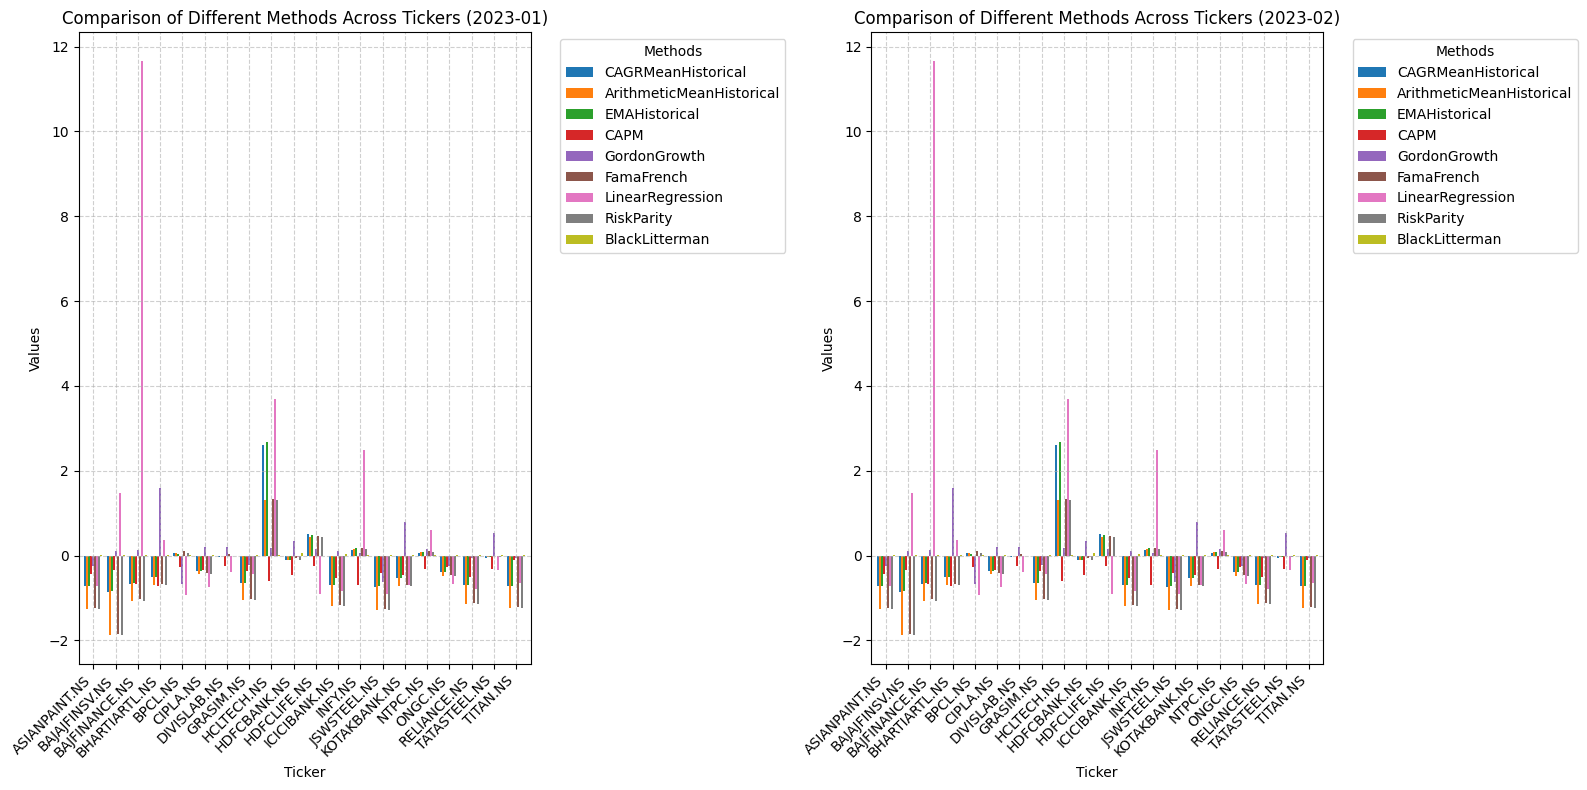

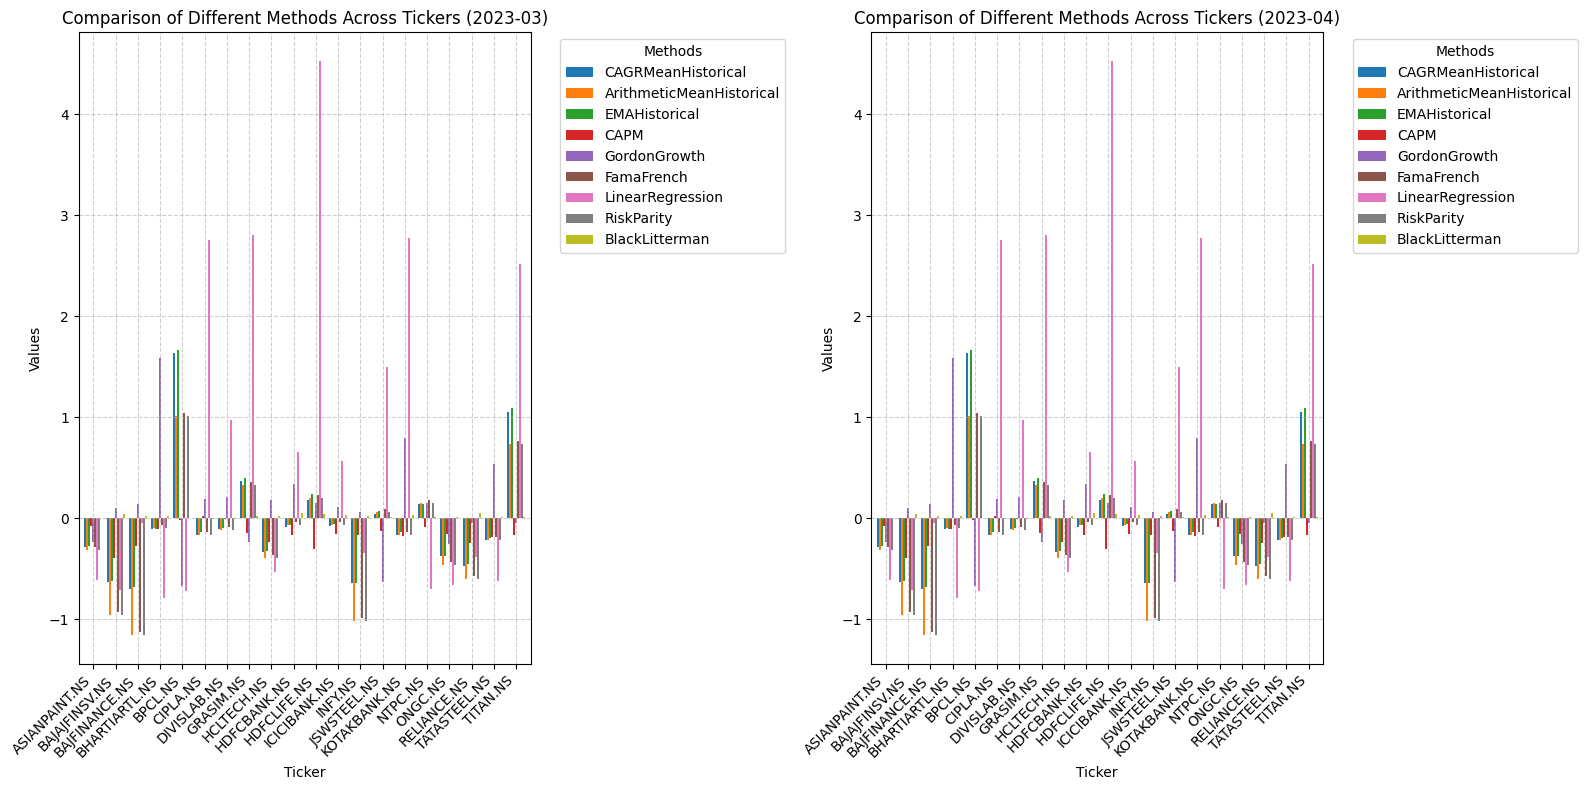

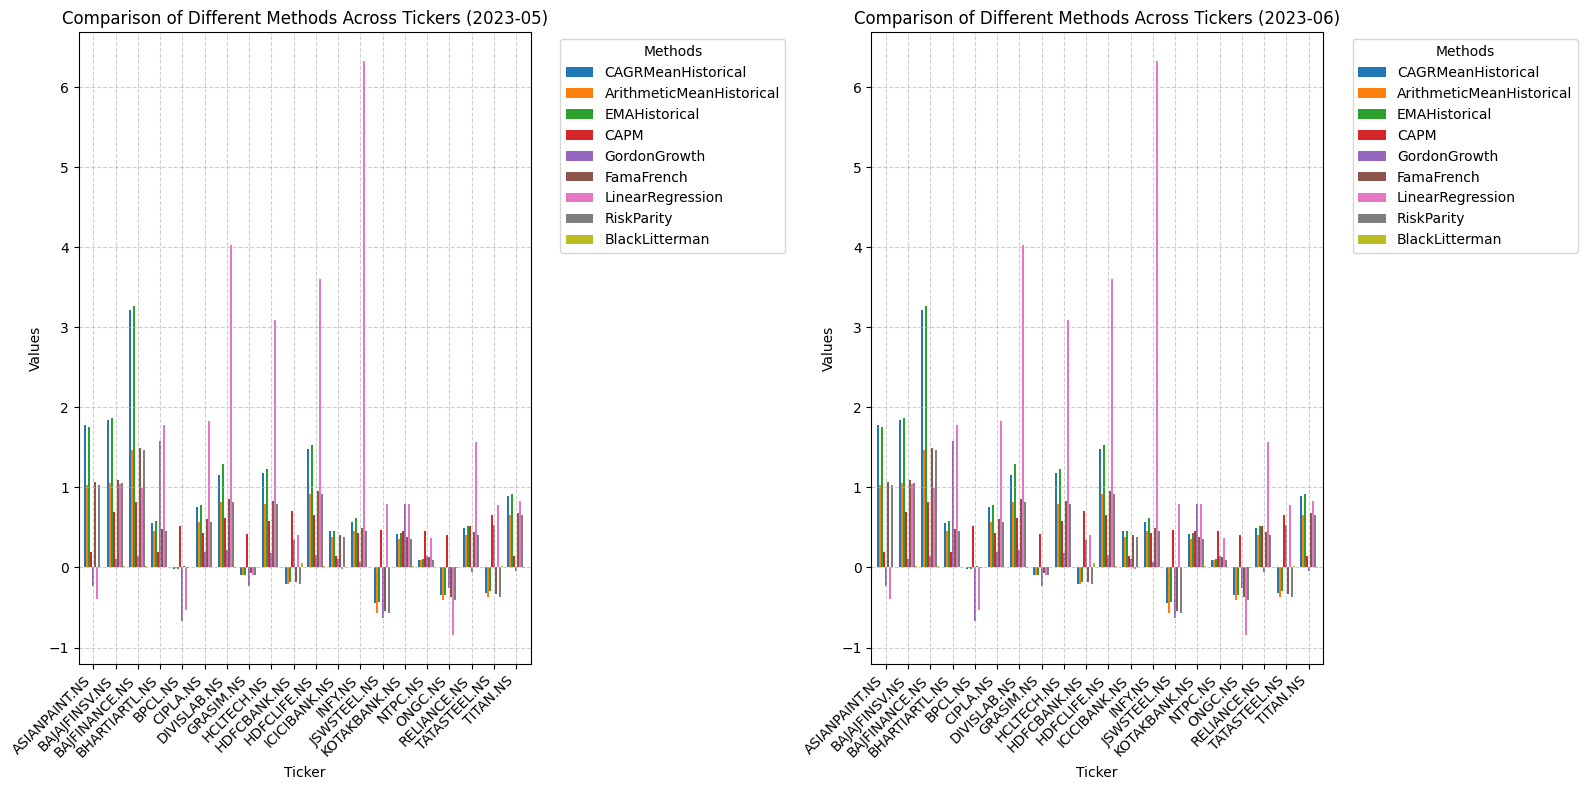

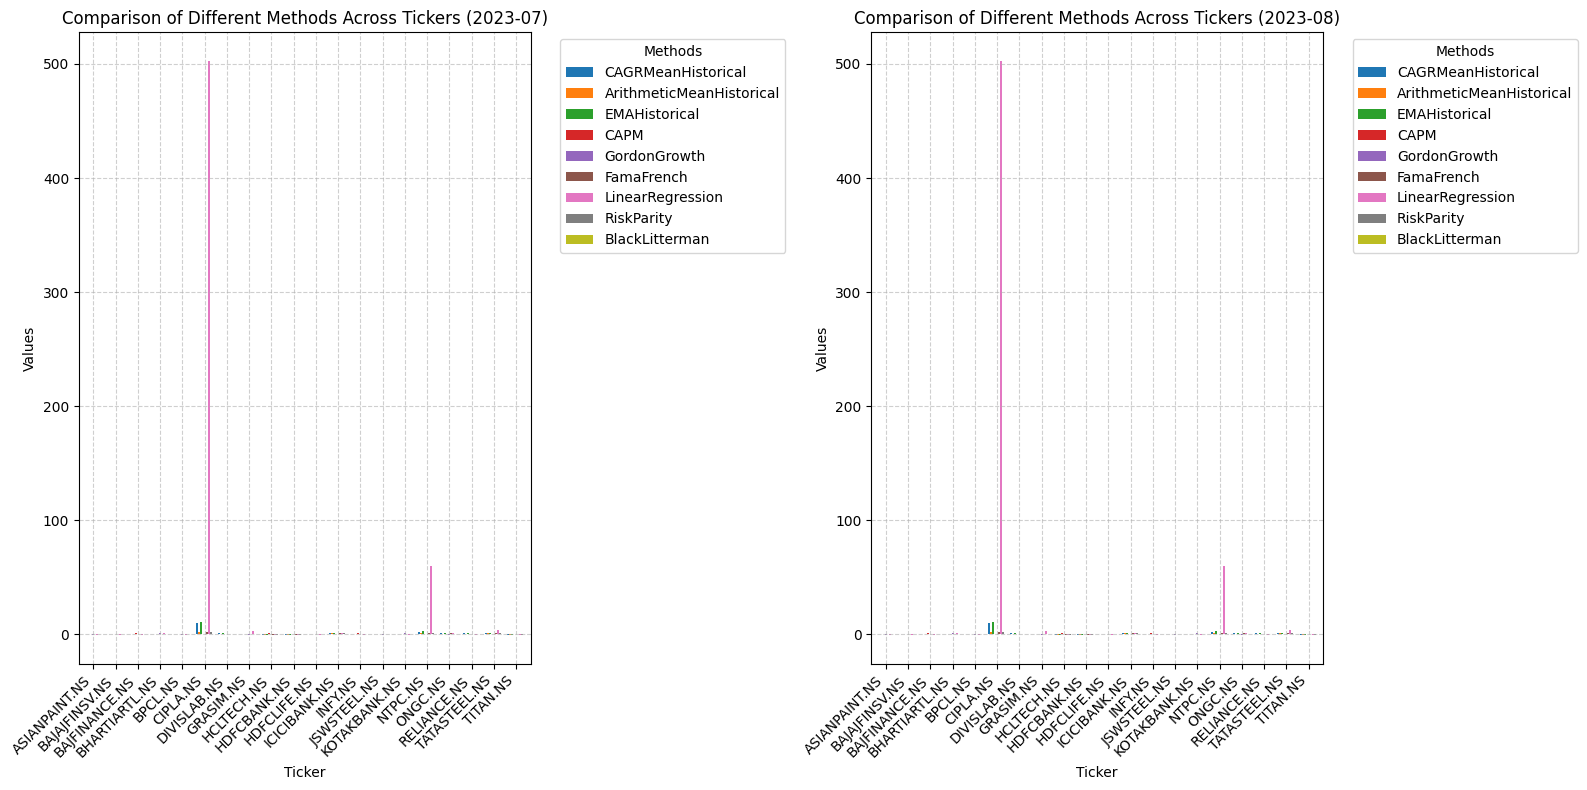

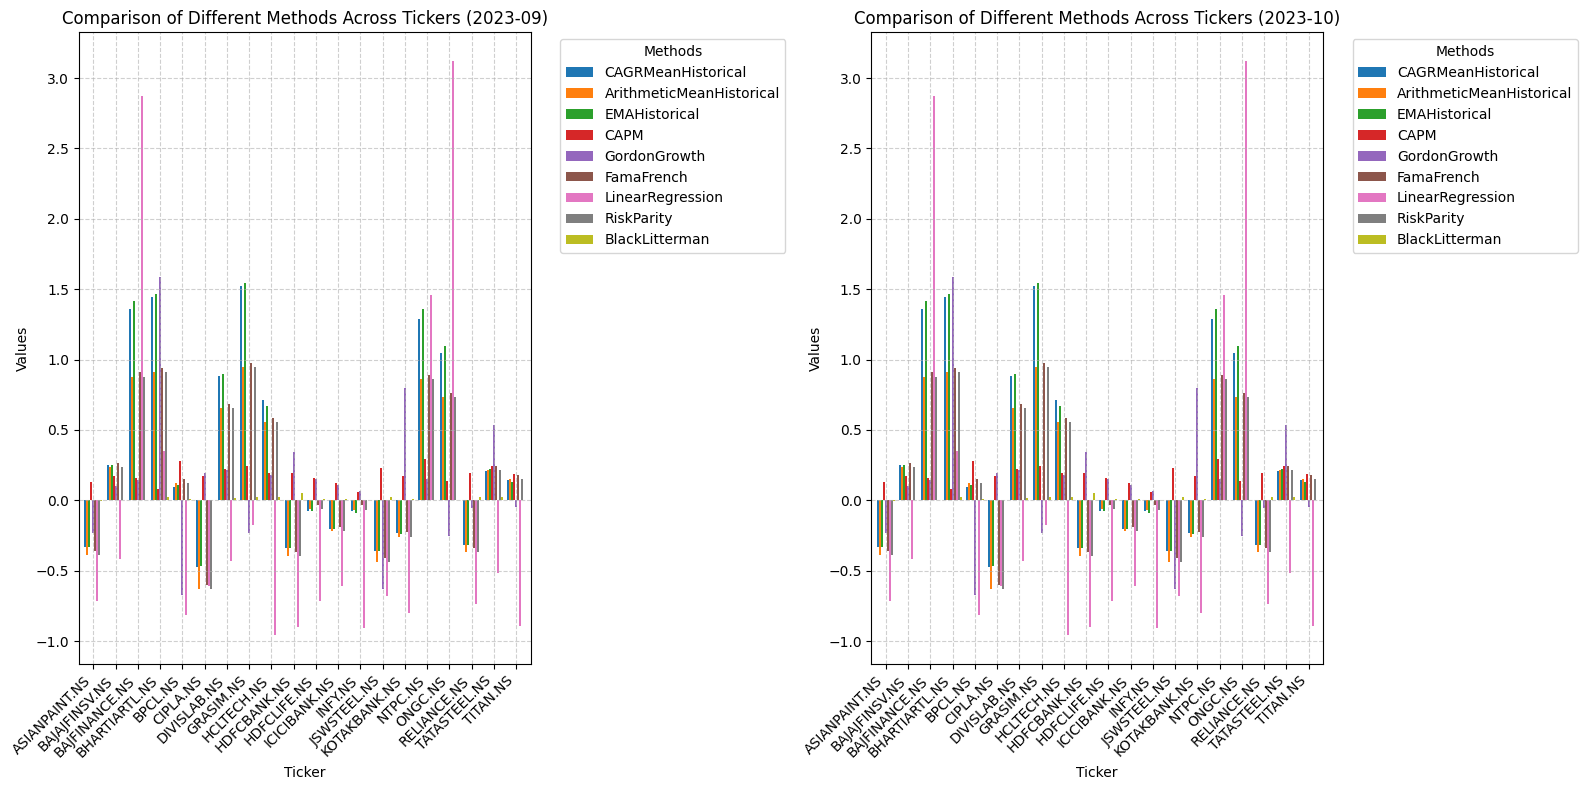

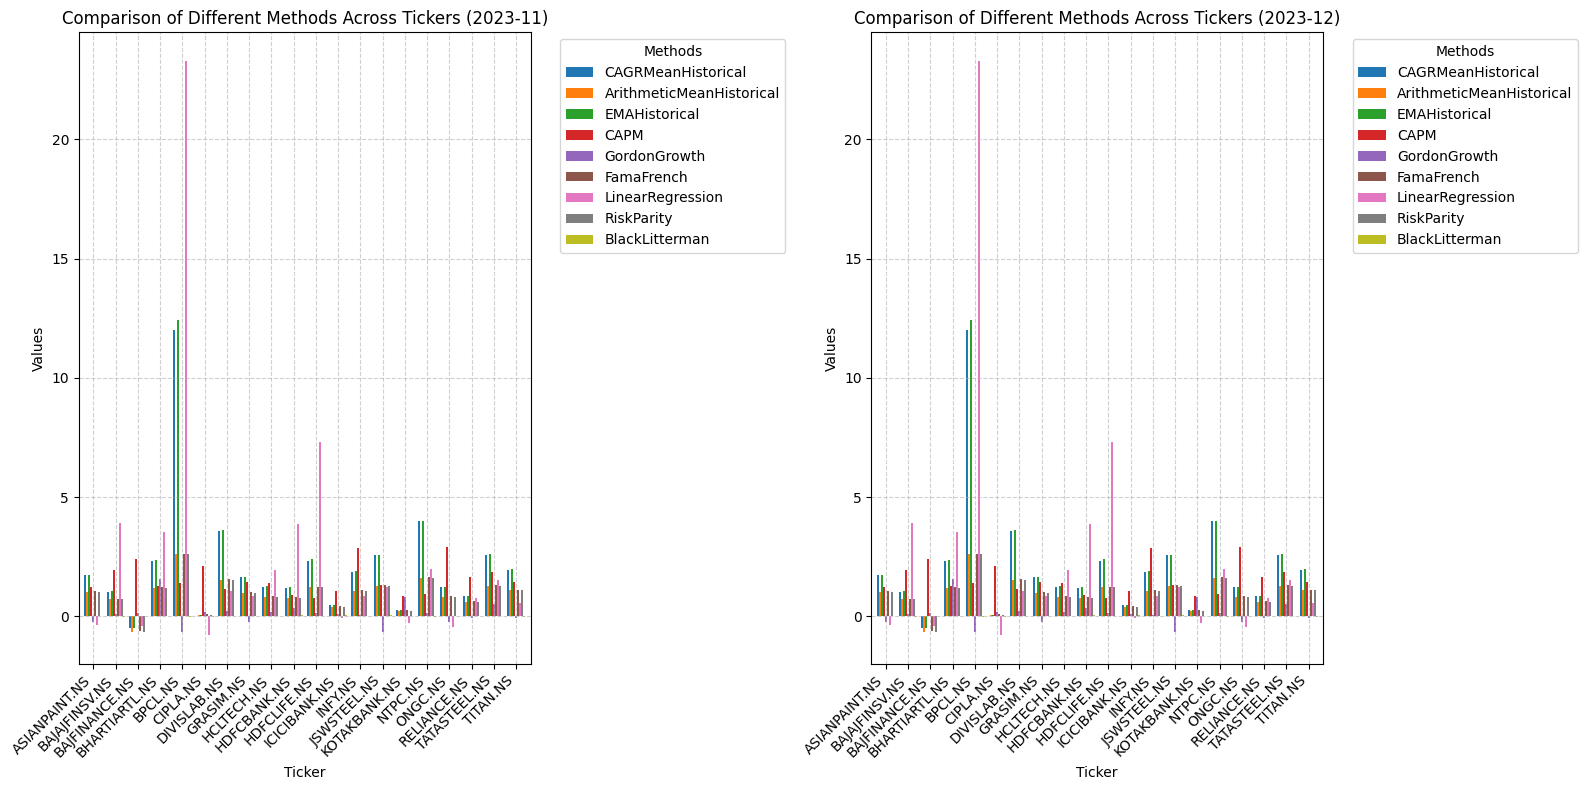

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


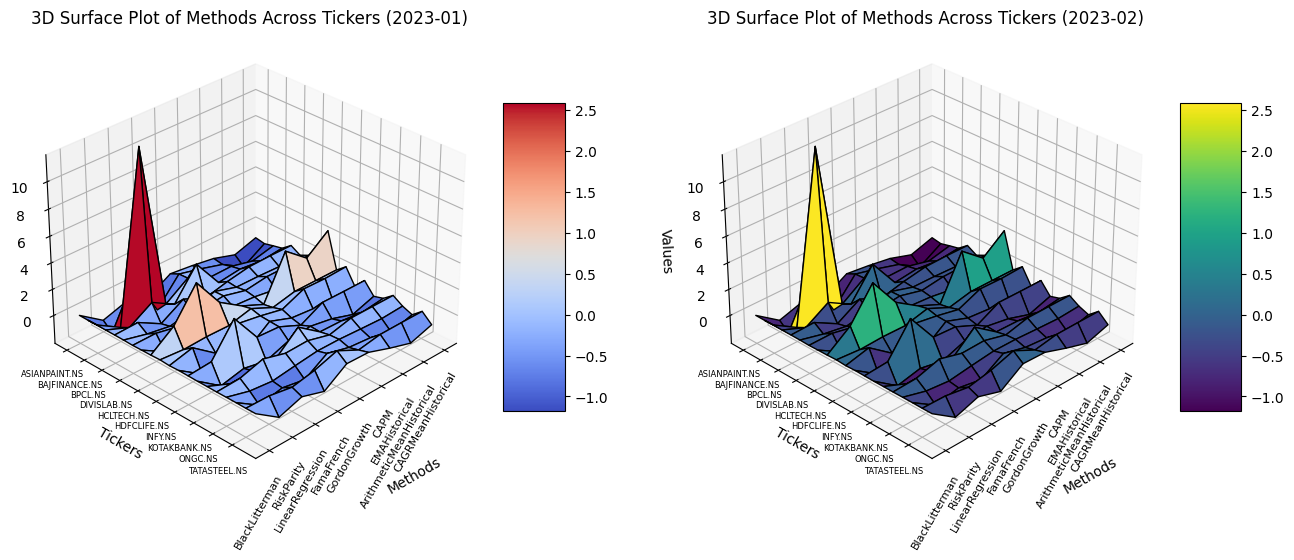

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


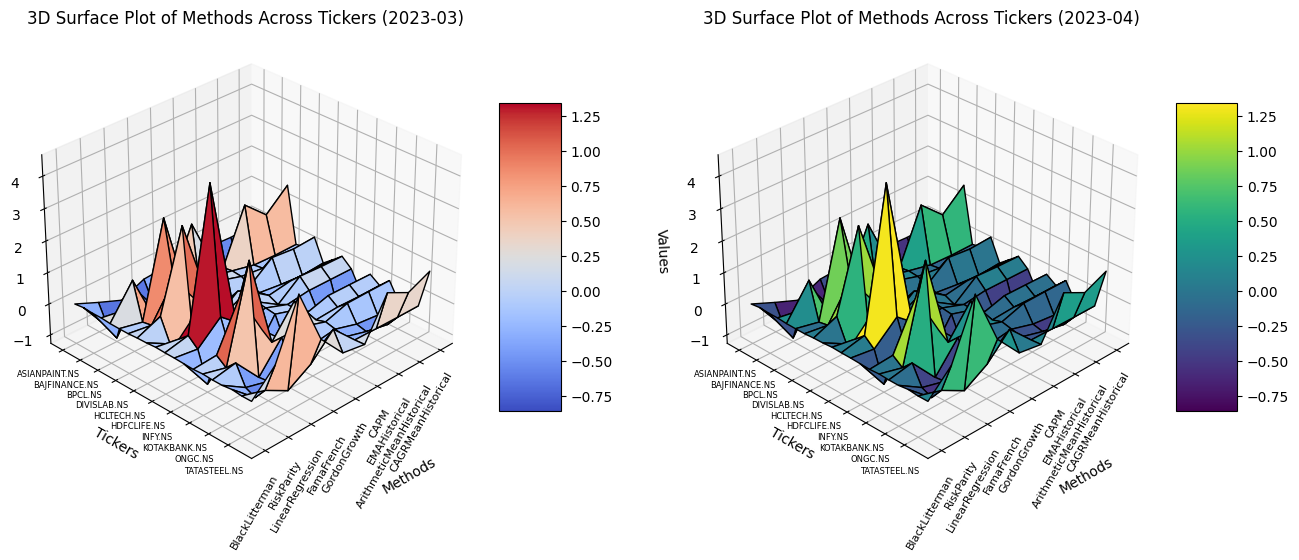

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


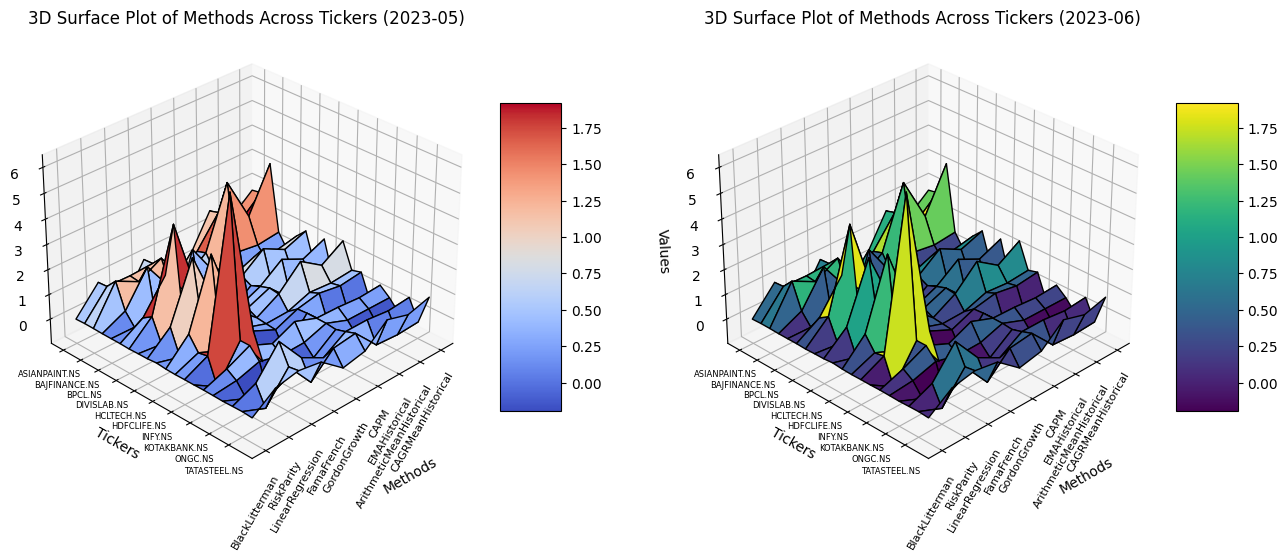

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


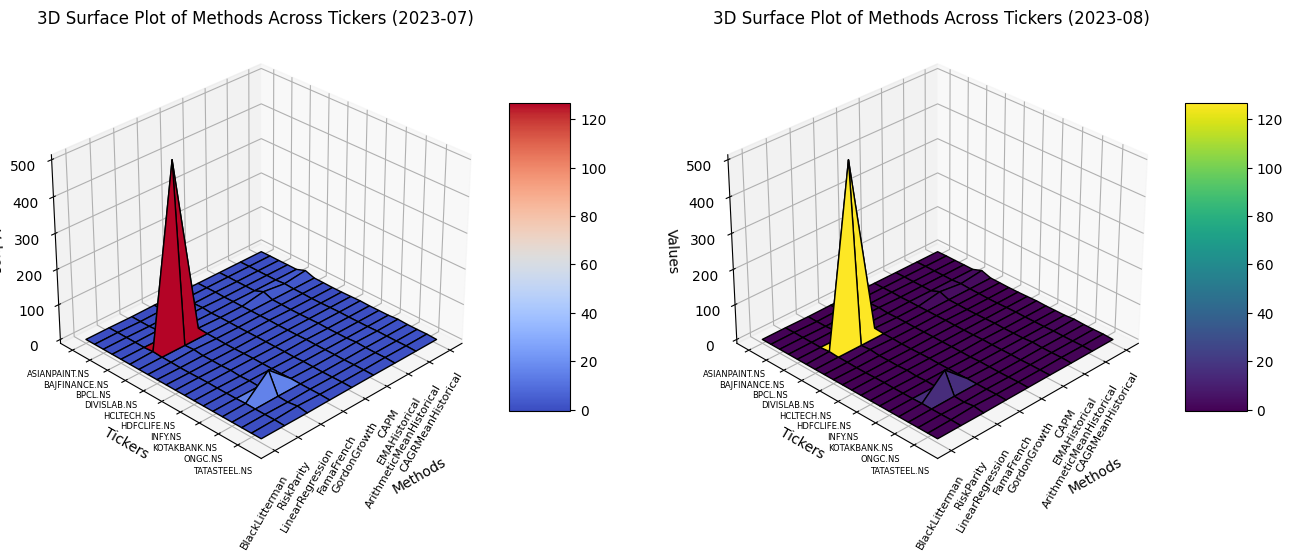

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


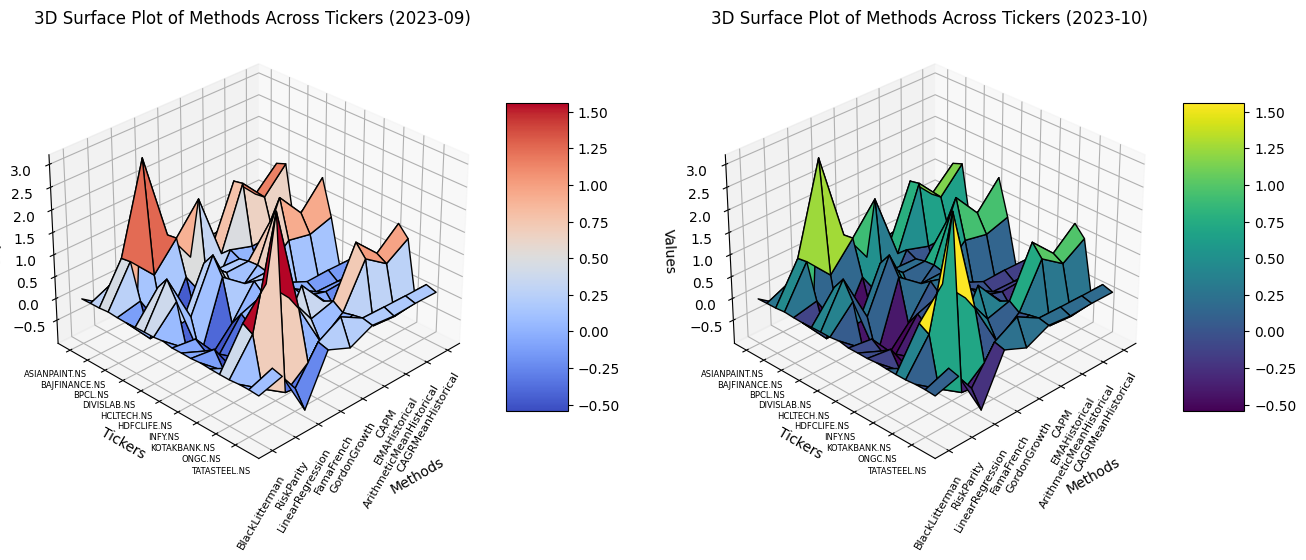

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


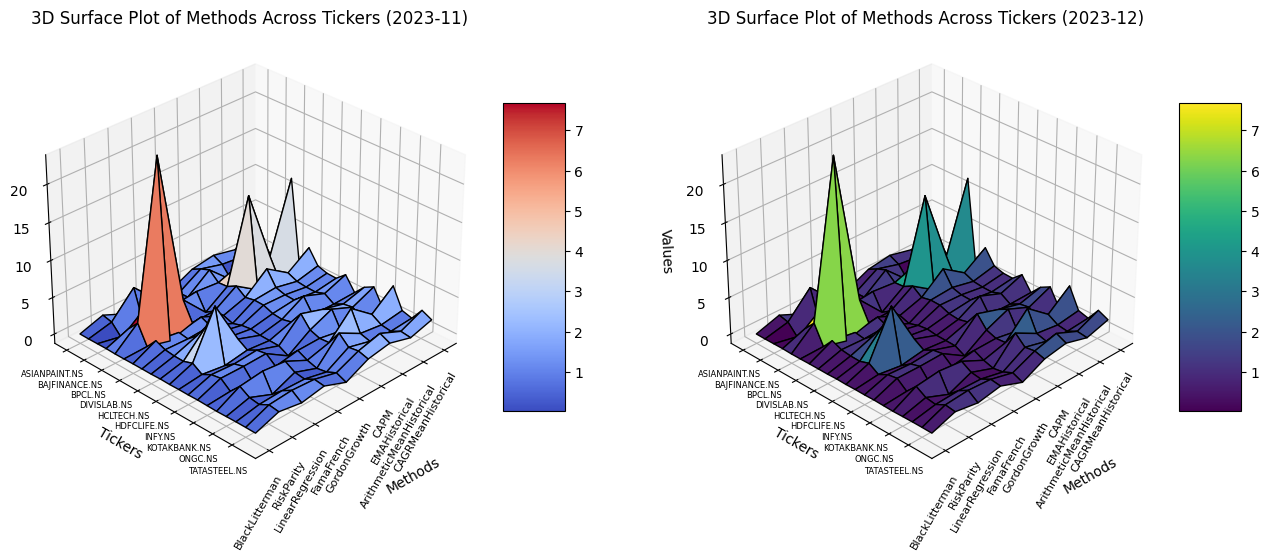

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd



if __name__ == "__main__":
    year = 2023
    # Generate date ranges for alternate months in 2023 (Jan, Mar, May, Jul, Sep, Nov)
    # plot generate current and next month
    alternate_months = [1, 3, 5, 7, 9, 11]
    month_ranges = generate_month_date_ranges(year,months = alternate_months)

    # # Plot all bar charts first
    for start_date, end_date in month_ranges:
        load_data_and_plot(start_date, data_dir, plot_bar_expected_return_df)

    # Then plot all 3D plots
    for start_date, end_date in month_ranges:
        load_data_and_plot(start_date, data_dir, plot_3d_expected_return_df)


In [23]:
date_range = generate_month_date_ranges(2023,months=[5,6])
print(date_range)
for start_date, end_date in date_range:
  current_mon_dir = create_current_month_directory(start_date, data_dir)
  print("start_date={},end_date={},current_mon_dir={}".format(start_date,end_date,current_mon_dir))
  expected_return_df =  pd.read_pickle(current_mon_dir /'expected_return.pkl')
  display(data_table.DataTable(expected_return_df))

[(datetime.date(2023, 5, 1), datetime.date(2023, 5, 31)), (datetime.date(2023, 6, 1), datetime.date(2023, 6, 30))]
start_date=2023-05-01,end_date=2023-05-31,current_mon_dir=/content/drive/MyDrive/data/202305


,CAGRMeanHistorical,ArithmeticMeanHistorical,EMAHistorical,CAPM,GordonGrowth,FamaFrench,LinearRegression,RiskParity,BlackLitterman
Ticker,,,,,,,,,
ASIANPAINT.NS,1.777217,1.034968,1.755770,0.187085,-0.2349,1.064968,-0.391200,1.034968,0.000651
BAJAJFINSV.NS,1.846914,1.061264,1.871417,0.696259,0.1005,1.091264,1.036844,1.061264,0.019133
BAJFINANCE.NS,3.221076,1.466183,3.272885,0.822717,0.1426,1.496183,0.990286,1.466183,0.015903
BHARTIARTL.NS,0.556736,0.453283,0.584180,0.189857,1.5847,0.483283,1.784937,0.453283,0.005934
BPCL.NS,-0.024153,-0.008755,-0.018002,0.513457,-0.6704,0.021245,-0.531418,-0.008755,0.005795
CIPLA.NS,0.760894,0.573265,0.783707,0.424569,0.1908,0.603265,1.825030,0.573265,0.008064
DIVISLAB.NS,1.153964,0.821557,1.294280,0.617584,0.2135,0.851557,4.024677,0.821557,-0.006253
GRASIM.NS,-0.099438,-0.095742,-0.091165,0.420206,-0.2304,-0.065742,-0.096252,-0.095742,0.007612
HCLTECH.NS,1.184508,0.797409,1.234223,0.576038,0.1795,0.827409,3.092464,0.797409,0.011826


start_date=2023-06-01,end_date=2023-06-30,current_mon_dir=/content/drive/MyDrive/data/202306


,CAGRMeanHistorical,ArithmeticMeanHistorical,EMAHistorical,CAPM,GordonGrowth,FamaFrench,LinearRegression,RiskParity,BlackLitterman
Ticker,,,,,,,,,
ASIANPAINT.NS,0.683798,0.531139,0.713157,0.547779,-0.2349,0.561139,2.260176,0.531139,-0.002819
BAJAJFINSV.NS,0.847629,0.626185,0.860632,0.657663,0.1005,0.656185,0.287172,0.626185,0.014596
BAJFINANCE.NS,0.097789,0.109326,0.109909,0.609406,0.1426,0.139326,-0.266998,0.109326,-0.006036
BHARTIARTL.NS,0.994830,0.700576,1.039212,0.326943,1.5847,0.730576,4.840424,0.700576,0.030152
BPCL.NS,0.031370,0.062900,0.059059,1.245075,-0.6704,0.092900,-0.322616,0.062900,-0.002411
CIPLA.NS,0.834230,0.624960,0.865739,0.157191,0.1908,0.654960,0.799297,0.624960,-0.031988
DIVISLAB.NS,0.327688,0.308193,0.377270,0.879175,0.2135,0.338193,2.718954,0.308193,-0.028729
GRASIM.NS,0.367477,0.334153,0.377980,1.039560,-0.2304,0.364153,-0.544048,0.334153,-0.000488
HCLTECH.NS,0.384396,0.338810,0.415688,0.458101,0.1795,0.368810,2.004728,0.338810,-0.010374
